In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [24]:
df = pd.read_csv("news.csv")

In [25]:
df.shape

(6335, 4)

In [26]:
df.head(10)

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
5,6903,"Tehran, USA","\r\nI’m not an immigrant, but my grandparent...",FAKE
6,7341,Girl Horrified At What She Watches Boyfriend D...,"Share This Baylee Luciani (left), Screenshot o...",FAKE
7,95,‘Britain’s Schindler’ Dies at 106,A Czech stockbroker who saved more than 650 Je...,REAL
8,4869,Fact check: Trump and Clinton at the 'commande...,Hillary Clinton and Donald Trump made some ina...,REAL
9,2909,Iran reportedly makes new push for uranium con...,Iranian negotiators reportedly have made a las...,REAL


In [27]:
df.isnull().sum()

Unnamed: 0    0
title         0
text          0
label         0
dtype: int64

In [6]:
labels=df.label

In [7]:
labels.head()

0    FAKE
1    FAKE
2    REAL
3    FAKE
4    REAL
Name: label, dtype: object

In [29]:
x_train, x_test, y_train, y_test = train_test_split(
    df["text"], labels, test_size=0.2, random_state=42
)

In [30]:
x_train.head()

1142    Donald Trump received a key endorsement for hi...
2654    Nina November 6, 2016 @ 2:39 pm \r\nPolish gov...
5395    Time: Investigating Hillary is an Attack on Al...
1170    Taki's Magazine October 28, 2016 \r\nThis elec...
4371    Pakistan Pakistan's cricketer turned politicia...
Name: text, dtype: object

In [31]:
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7, ngram_range=(1, 2))
tf_train = vectorizer.fit_transform(x_train)
tf_test = vectorizer.transform(x_test)

In [32]:
pac = PassiveAggressiveClassifier(max_iter=1000, random_state=42)
pac.fit(tf_train,y_train)

PassiveAggressiveClassifier(random_state=42)

In [33]:
y_pred = pac.predict(tf_test)

In [34]:
score= accuracy_score(y_test,y_pred)

In [35]:
print(f"Accuracy:{round(score*100,2)}%")

Accuracy:93.69%


In [36]:
confusion_matrix(y_test,y_pred,labels=['FAKE','REAL'])

array([[577,  51],
       [ 29, 610]], dtype=int64)

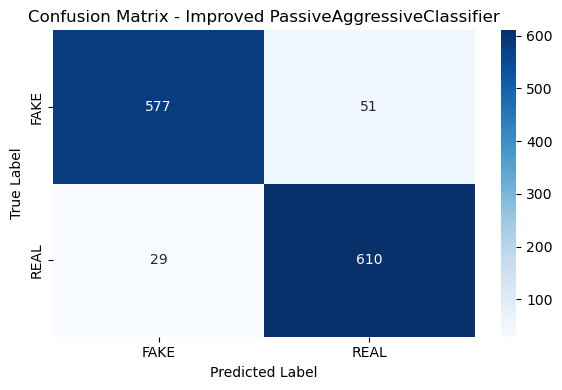

In [41]:
from sklearn.metrics import confusion_matrix

# Compute confusion matrix with new variable name
conf_matrix = confusion_matrix(y_test, y_pred, labels=["FAKE", "REAL"])

# Plotting
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=["FAKE", "REAL"], yticklabels=["FAKE", "REAL"])
plt.title("Confusion Matrix - Improved PassiveAggressiveClassifier")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()


In [42]:
import pickle
filename='finalized_model.pkl'
pickle.dump(pac,open(filename,'wb'))

In [43]:
filename='vectorizer(2).pkl'
pickle.dump(vector,open(filename,'wb'))

In [45]:
import joblib

# Save your trained vectorizer and model
joblib.dump(vectorizer, "tfidf_vectorizer.pkl")  # Correct!
joblib.dump(pac, "fake_news_model.pkl")          # Correct!


['fake_news_model.pkl']

In [46]:


# Load the correct files
vectorizer = joblib.load("tfidf_vectorizer.pkl")  # TF-IDF Vectorizer
model = joblib.load("fake_news_model.pkl")        # Trained Classifier

# Input and transform
example = ["NASA confirms alien life on Mars in new sample"]
example_vec = vectorizer.transform(example)

# Predict
prediction = model.predict(example_vec)
print("Prediction:", prediction[0])


Prediction: FAKE
